In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from irregular_backtesting.Backtest import single_Backtest
from irregular_backtesting.technical_anaysis import bollinger_percent, stochastic, intraday_intensity, moving_average, money_flow_index, no_deal
from regular_backtesting.basic import basic_balance
import pyupbit

In [2]:
coin_price  = pd.read_csv('data_directory/coin_price.csv', header=[0,1], index_col=0)


when bollinger param = 80, buy_signal_num = 403
when bollinger param = 70, buy_signal_num = 572
when bollinger param = 60, buy_signal_num = 714
when bollinger param = 50, buy_signal_num = 824


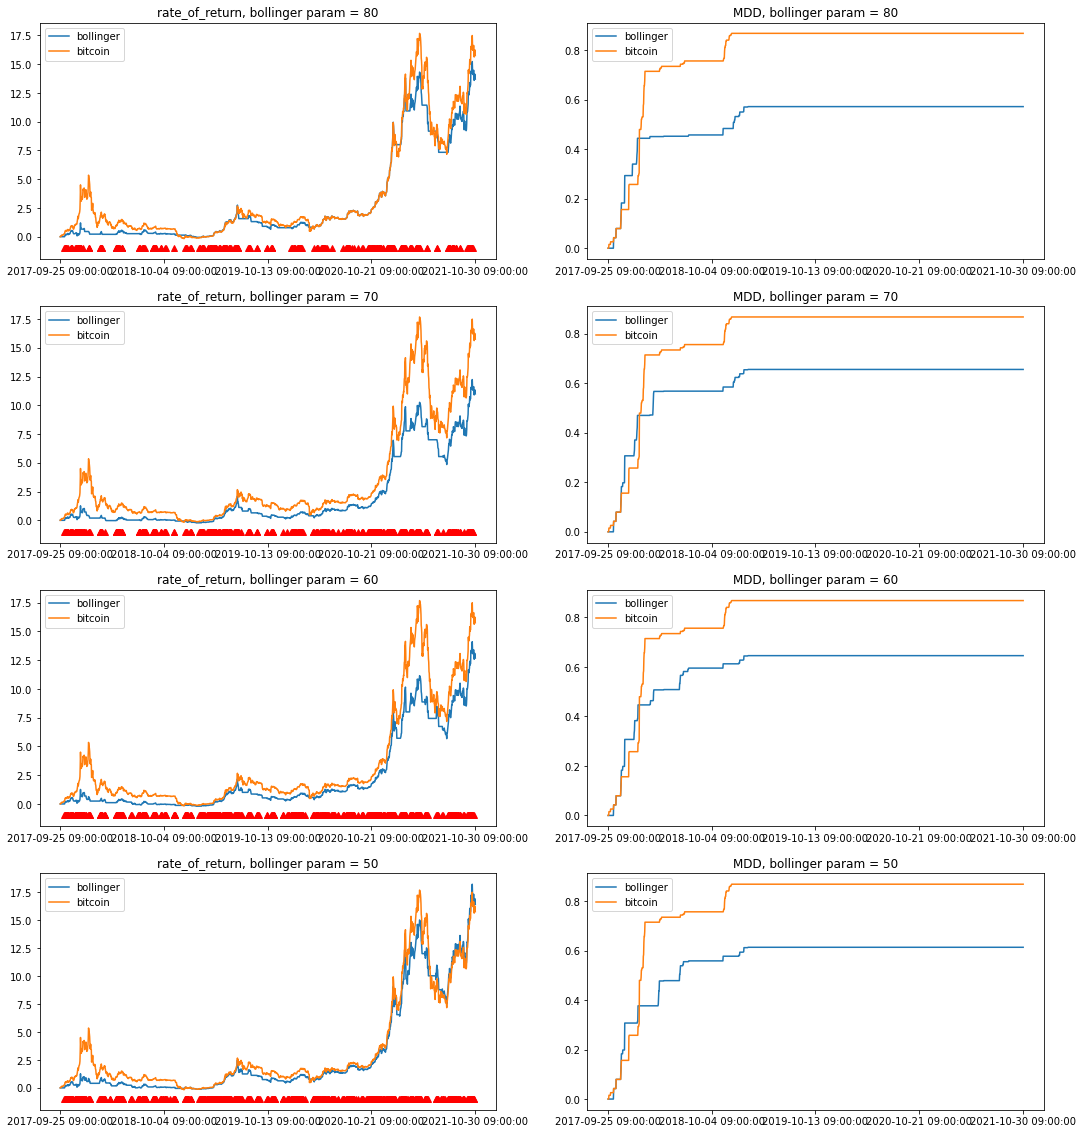

In [26]:
start='2017-09'
end='2021-11'

bit = basic_balance(coin_price, 'KRW-BTC')
bit.fit(start=start, end=end)

f, ax = plt.subplots(4,2, figsize=(18,20))
ax=ax.flatten()

params = [80,70,60,50]

for i in range(4):
    buy_bp = bollinger_percent(param=[params[i],'up'], period = 15)
    sell = no_deal()
    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp], sell_estimators = [sell], coin=True, fee=0.0005, stop_loss=-0.2)
    back.fit(start=start, end=end)

    ax[2*i].plot(back.balance.index, back.balance['rate_of_return'], label='bollinger')
    ax[2*i].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
    for idx in back.buy_signal:
        ax[2*i].plot(idx, -1, 'r^')
    for idx in back.sell_signal:
        ax[2*i].plot(idx, -1, 'bv')
    ax[2*i].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i].legend()
    ax[2*i].set_title(f'rate_of_return, bollinger param = {params[i]}')

    ax[2*i+1].plot(back.balance.index, back.balance['MDD'], label='bollinger')
    ax[2*i+1].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
    ax[2*i+1].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i+1].legend()
    ax[2*i+1].set_title(f'MDD, bollinger param = {params[i]}')

    print(f'when bollinger param = {params[i]}, buy_signal_num = {len(back.buy_signal)}')
plt.show()


50 넘을때 매수가 가장 결과 좋다

when mfi param = 80, buy_signal_num = 222
when mfi param = 70, buy_signal_num = 410
when mfi param = 60, buy_signal_num = 601
when mfi param = 50, buy_signal_num = 862


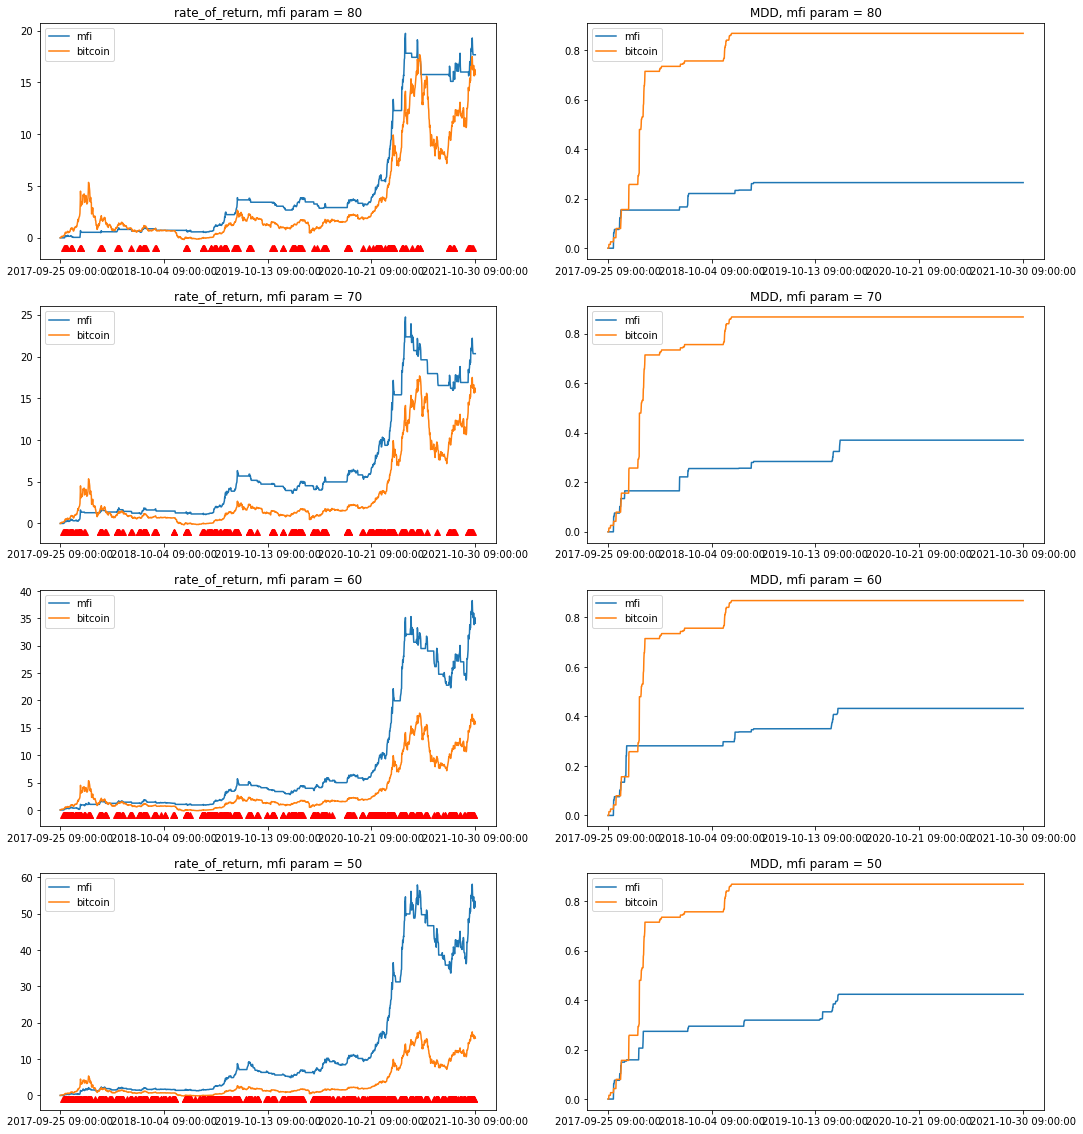

In [27]:
start='2017-09'
end='2021-11'

bit = basic_balance(coin_price, 'KRW-BTC')
bit.fit(start=start, end=end)

f, ax = plt.subplots(4,2, figsize=(18,20))
ax=ax.flatten()

params = [80,70,60,50]

for i in range(4):
    buy_mfi = money_flow_index(param=[params[i],'up'], period = 10)
    sell = no_deal()
    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_mfi], sell_estimators = [sell], coin=True, fee=0.0005, stop_loss=-0.1)
    back.fit(start=start, end=end)

    ax[2*i].plot(back.balance.index, back.balance['rate_of_return'], label='mfi')
    ax[2*i].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
    for idx in back.buy_signal:
        ax[2*i].plot(idx, -1, 'r^')
    for idx in back.sell_signal:
        ax[2*i].plot(idx, -1, 'bv')
    ax[2*i].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i].legend()
    ax[2*i].set_title(f'rate_of_return, mfi param = {params[i]}')

    ax[2*i+1].plot(back.balance.index, back.balance['MDD'], label='mfi')
    ax[2*i+1].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
    ax[2*i+1].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i+1].legend()
    ax[2*i+1].set_title(f'MDD, mfi param = {params[i]}')

    print(f'when mfi param = {params[i]}, buy_signal_num = {len(back.buy_signal)}')
plt.show()


50 넘을 때 매수가 가장 좋다

when mfi period = 5, buy_signal_num = 344
when mfi period = 7, buy_signal_num = 291
when mfi period = 10, buy_signal_num = 222
when mfi period = 13, buy_signal_num = 174


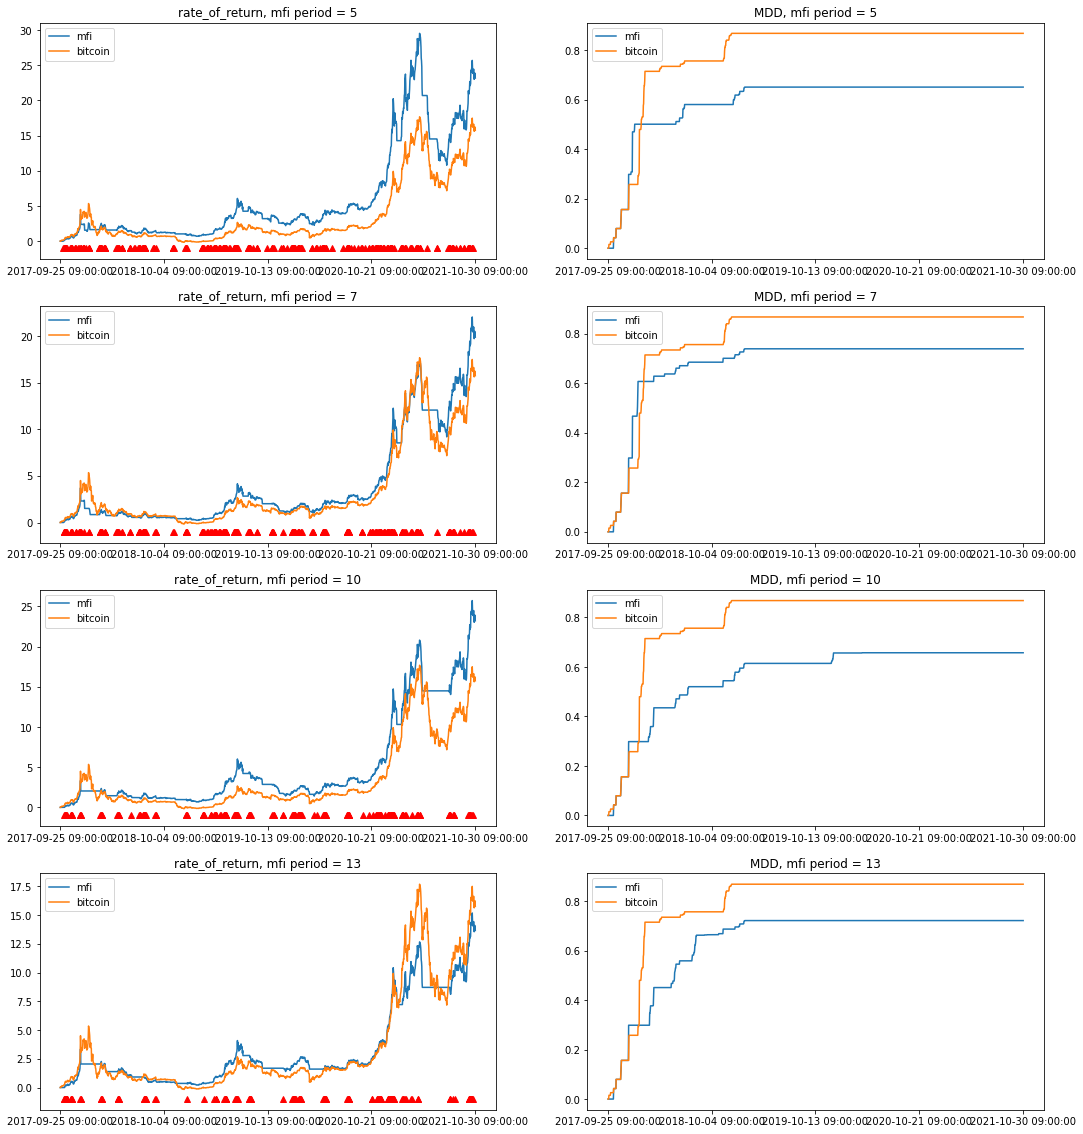

In [36]:
start='2017-09'
end='2021-11'

bit = basic_balance(coin_price, 'KRW-BTC')
bit.fit(start=start, end=end)

f, ax = plt.subplots(4,2, figsize=(18,20))
ax=ax.flatten()

periods = [5,7,10,13]

for i in range(4):
    buy_mfi = money_flow_index(param=[80,'up'], period = periods[i])
    sell = no_deal()
    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_mfi], sell_estimators = [sell], coin=True, fee=0.0005, stop_loss=-0.3)
    back.fit(start=start, end=end)

    ax[2*i].plot(back.balance.index, back.balance['rate_of_return'], label='mfi')
    ax[2*i].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
    for idx in back.buy_signal:
        ax[2*i].plot(idx, -1, 'r^')
    for idx in back.sell_signal:
        ax[2*i].plot(idx, -1, 'bv')
    ax[2*i].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i].legend()
    ax[2*i].set_title(f'rate_of_return, mfi period = {periods[i]}')

    ax[2*i+1].plot(back.balance.index, back.balance['MDD'], label='mfi')
    ax[2*i+1].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
    ax[2*i+1].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i+1].legend()
    ax[2*i+1].set_title(f'MDD, mfi period = {periods[i]}')

    print(f'when mfi period = {periods[i]}, buy_signal_num = {len(back.buy_signal)}')
plt.show()


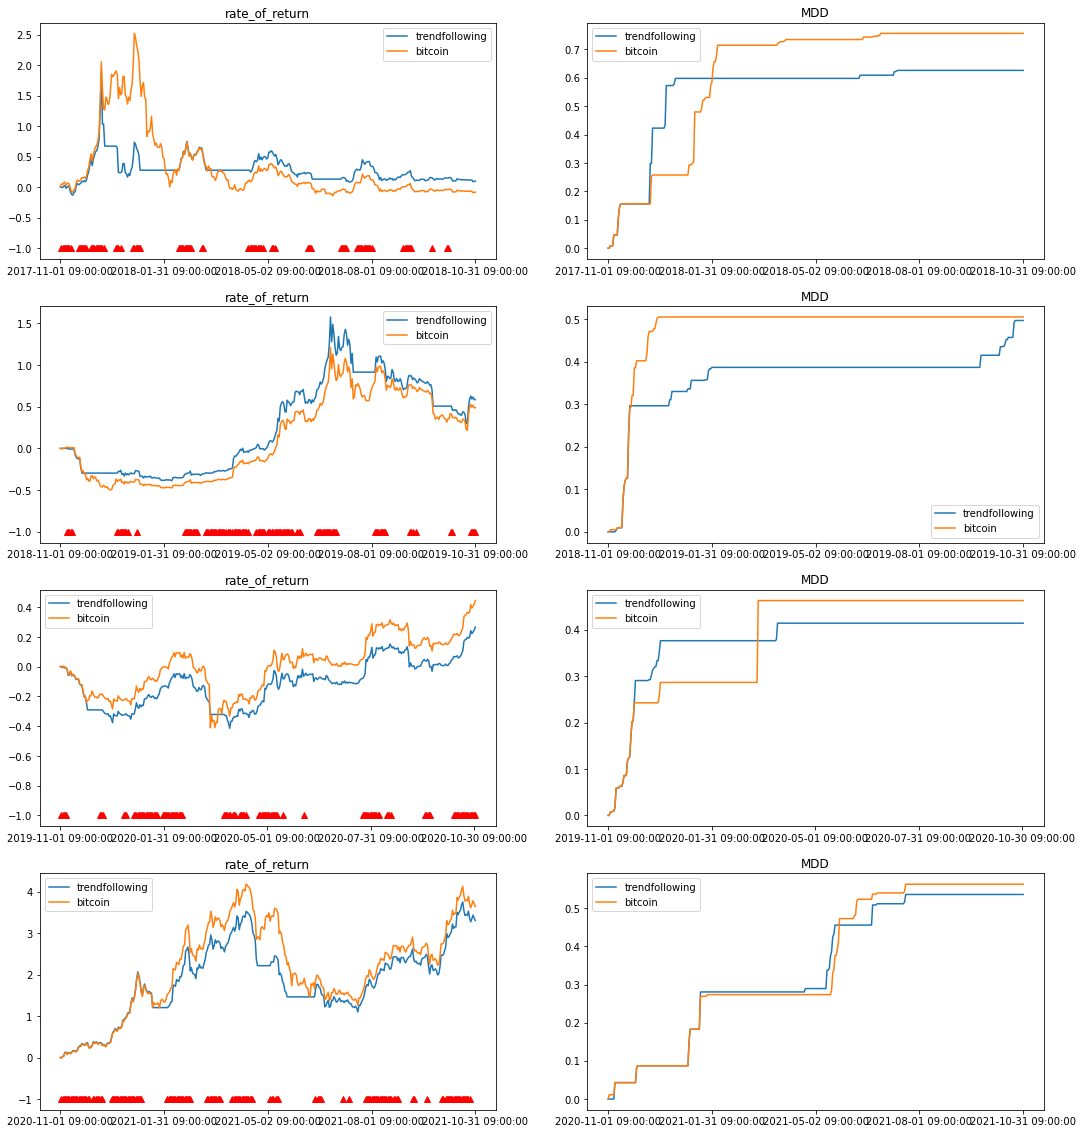

In [41]:
starts=['2017-11','2018-11','2019-11','2020-11']
ends=['2018-11','2019-11','2020-11','2021-11']


f, ax = plt.subplots(4,2, figsize=(18,20))
ax=ax.flatten()

for i in range(4):
    bit = basic_balance(coin_price, 'KRW-BTC')
    bit.fit(start=starts[i], end=ends[i])
    buy_bp = bollinger_percent(param=[50,'up'], period=15)
    buy_mfi = money_flow_index(param=[60,'up'], period = 10)
    sell = no_deal()
    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp, buy_mfi], sell_estimators = [sell], coin=True, fee=0.0005, stop_loss=-0.3)
    back.fit(start=starts[i], end=ends[i])

    ax[2*i].plot(back.balance.index, back.balance['rate_of_return'], label='trendfollowing')
    ax[2*i].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
    for idx in back.buy_signal:
        ax[2*i].plot(idx, -1, 'r^')
    for idx in back.sell_signal:
        ax[2*i].plot(idx, -1, 'bv')
    ax[2*i].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i].legend()
    ax[2*i].set_title(f'rate_of_return')

    ax[2*i+1].plot(back.balance.index, back.balance['MDD'], label='trendfollowing')
    ax[2*i+1].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
    ax[2*i+1].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i+1].legend()
    ax[2*i+1].set_title(f'MDD')

plt.show()


In [45]:
start='2017-09'
end='2021-11'

buy_bp_params = [80,70,60,50]

buy_mfi_params = [80,70,60,50]

sell_bp_params = [20,30,40,50]

sell_mfi_params = [20,30,40,50]

stop_losses = [-0.1,-0.2,-0.3]

total_list = []
for bb in buy_bp_params:
    buy_bp = bollinger_percent(param=[bb,'up'], period=15)
    for bm in buy_mfi_params:
        buy_mfi = money_flow_index(param=[bm,'up'], period=10)
        for sb in sell_bp_params:
            sell_bp = bollinger_percent(param=[sb,'down'], period=15)
            for sm in sell_mfi_params:
                sell_mfi = money_flow_index(param=[sm,'down'], period=10)
                for sl in stop_losses:
                    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp,buy_mfi], sell_estimators = [sell_bp,sell_mfi], coin=True, fee=0.0005, stop_loss=sl)
                    back.fit(start=start, end=end)
                    total_list.append(back)

In [67]:
grid_search = pd.DataFrame(columns=['rate_of_return','mdd','buy_bp','buy_mfi','sell_bp','sell_mfi','stop_loss'])

for cl in total_list:
    test = {}
    test['rate_of_return'] = cl.balance.rate_of_return[-1]
    test['mdd'] = cl.balance.MDD[-1]
    test['buy_bp'] = cl.buy_estimators[0].param[0]
    test['buy_mfi'] = cl.buy_estimators[1].param[0]
    test['sell_bp'] = cl.sell_estimators[0].param[0]
    test['sell_mfi'] = cl.sell_estimators[1].param[0]
    test['stop_loss'] = cl.stop_loss
    grid_search = grid_search.append(test, ignore_index=True)


In [71]:
grid_search.sort_values(by='rate_of_return', ascending=False).head(20)

,rate_of_return,mdd,buy_bp,buy_mfi,sell_bp,sell_mfi,stop_loss
735,41.863498,0.403149,50.0,50.0,30.0,30.0,-0.1
738,40.920552,0.399968,50.0,50.0,30.0,40.0,-0.1
747,40.112681,0.399588,50.0,50.0,40.0,30.0,-0.1
759,40.042921,0.397807,50.0,50.0,50.0,30.0,-0.1
16,40.001869,0.357007,80.0,80.0,30.0,30.0,-0.2
726,39.934609,0.400515,50.0,50.0,20.0,40.0,-0.1
723,39.673717,0.403693,50.0,50.0,20.0,30.0,-0.1
729,39.636756,0.380494,50.0,50.0,20.0,50.0,-0.1
750,39.292160,0.396388,50.0,50.0,40.0,40.0,-0.1
756,39.121685,0.397807,50.0,50.0,50.0,20.0,-0.1


In [77]:
grid_search[grid_search['mdd'] < 0.35].sort_values(by='rate_of_return', ascending=False).head(20)

,rate_of_return,mdd,buy_bp,buy_mfi,sell_bp,sell_mfi,stop_loss
19,35.116188,0.329098,80.0,80.0,30.0,40.0,-0.2
31,31.415692,0.329098,80.0,80.0,40.0,40.0,-0.2
7,30.859344,0.333517,80.0,80.0,20.0,40.0,-0.2
43,30.729329,0.329098,80.0,80.0,50.0,40.0,-0.2
87,28.372069,0.341902,80.0,70.0,50.0,30.0,-0.1
663,28.295220,0.341518,50.0,70.0,50.0,30.0,-0.1
75,28.285222,0.341902,80.0,70.0,40.0,30.0,-0.1
10,28.211748,0.329042,80.0,80.0,20.0,50.0,-0.2
651,28.208599,0.341518,50.0,70.0,40.0,30.0,-0.1
471,27.670198,0.341518,60.0,70.0,50.0,30.0,-0.1


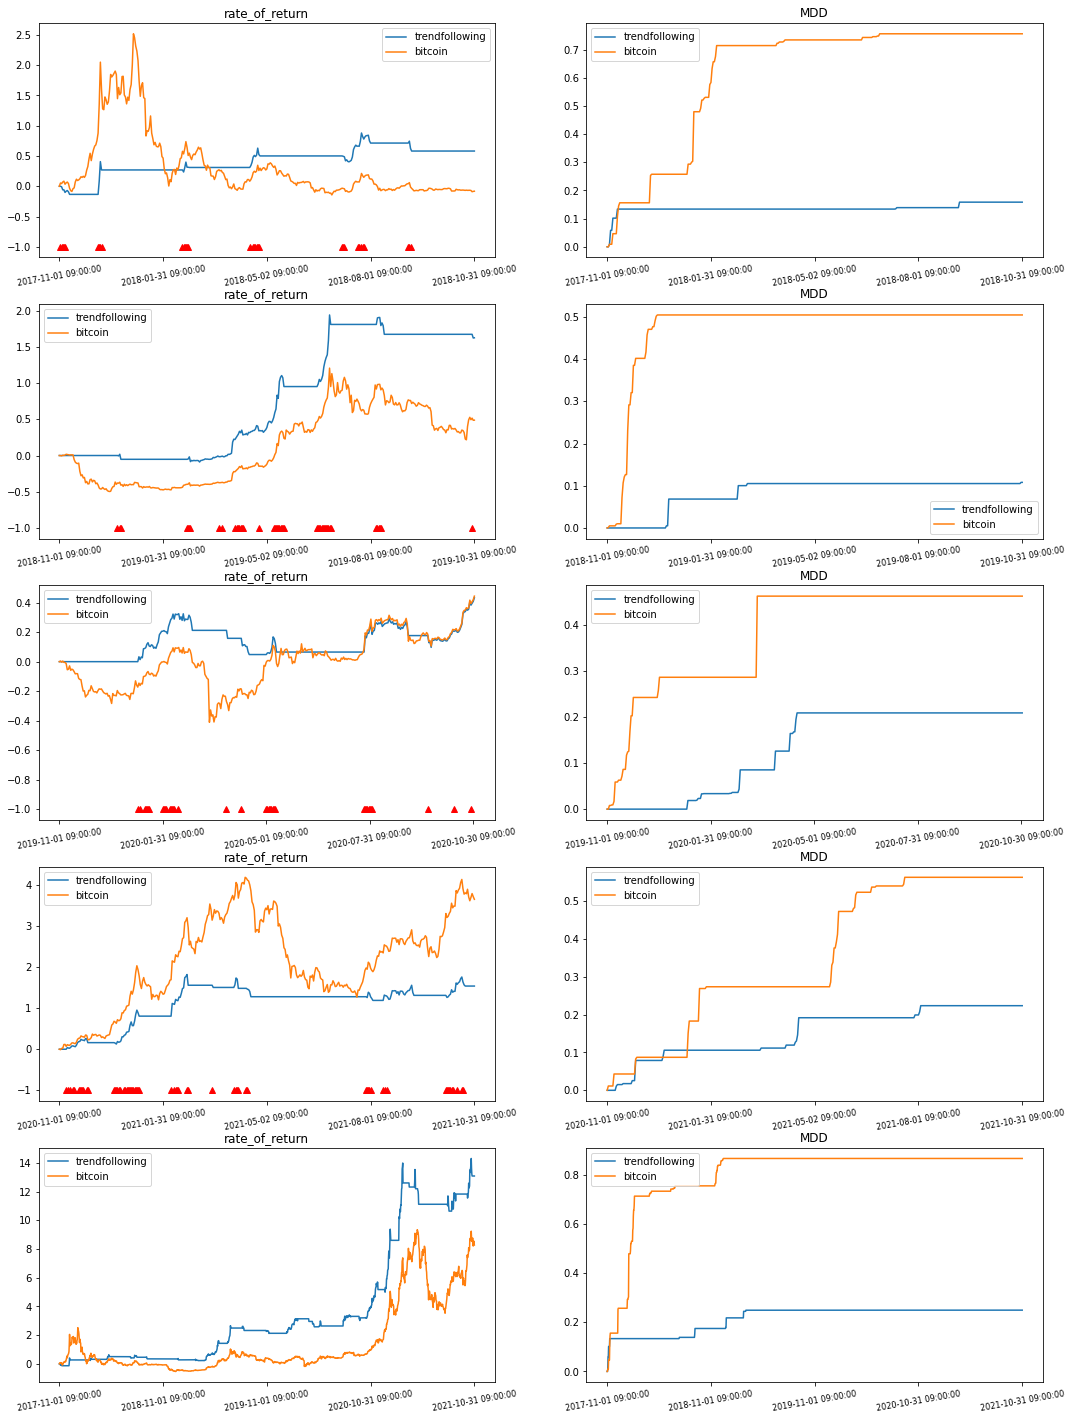

In [180]:
starts=['2017-11','2018-11','2019-11','2020-11']
ends=['2018-11','2019-11','2020-11','2021-11']

f, ax = plt.subplots(5,2, figsize=(18,25))
ax=ax.flatten()

buy_bp = bollinger_percent(param=[80,'up'], period=15)
buy_mfi = money_flow_index(param=[80,'up'], period=10)
sell_bp = bollinger_percent(param=[50,'down'], period=15)
sell_mfi = money_flow_index(param=[50,'down'], period=10)
sell = no_deal()

for i in range(4):
    bit = basic_balance(coin_price, 'KRW-BTC')
    bit.fit(start=starts[i], end=ends[i])
    back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp, buy_mfi], sell_estimators = [sell], coin=True, fee=0.0005, stop_loss=-0.1)
    back.fit(start=starts[i], end=ends[i])

    ax[2*i].plot(back.balance.index, back.balance['rate_of_return'], label='trendfollowing')
    ax[2*i].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
    for idx in back.buy_signal:
        ax[2*i].plot(idx, -1, 'r^')
    for idx in back.sell_signal:
        ax[2*i].plot(idx, -1, 'bv')
    ax[2*i].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    xlabel= [back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)]
    ax[2*i].set_xticklabels(xlabel, rotation=10, size=8)
    ax[2*i].legend()
    ax[2*i].set_title(f'rate_of_return')

    ax[2*i+1].plot(back.balance.index, back.balance['MDD'], label='trendfollowing')
    ax[2*i+1].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
    ax[2*i+1].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
    ax[2*i+1].set_xticklabels(xlabel, rotation=10, size=8)
    ax[2*i+1].legend()
    ax[2*i+1].set_title(f'MDD')

bit = basic_balance(coin_price, 'KRW-BTC')
bit.fit(start=starts[0], end=ends[3])
back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp, buy_mfi], sell_estimators = [sell_bp, sell_mfi], coin=True, fee=0.0005, stop_loss=-0.1)
back.fit(start=starts[0], end=ends[3])

ax[8].plot(back.balance.index, back.balance['rate_of_return'], label='trendfollowing')
ax[8].plot(back.balance.index, bit.balance['rate_of_return'],label='bitcoin')
ax[8].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
xlabel= [back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)]
ax[8].set_xticklabels(xlabel, rotation=10, size=8)
ax[8].legend()
ax[8].set_title(f'rate_of_return')

ax[9].plot(back.balance.index, back.balance['MDD'], label='trendfollowing')
ax[9].plot(back.balance.index, bit.balance['MDD'],label='bitcoin')
ax[9].set_xticks([back.balance.index[i] for i in range(0,len(back.balance.index),len(back.balance.index)//4)])
ax[9].set_xticklabels(xlabel, rotation=10, size=8)
ax[9].legend()
ax[9].set_title(f'MDD')


plt.show()


In [143]:
starts=['2017-11','2018-11','2019-11','2020-11']
ends=['2018-11','2019-11','2020-11','2021-11']

buy_bp_params = [80,70,60,50]

buy_mfi_params = [80,70,60,50]

sell_bp_params = [20,30,40,50]

sell_mfi_params = [20,30,40,50]

stop_losses = [-0.1,-0.2,-0.3]

total_list = {}
for i in range(4):
    total_list[i] = []
for bb in buy_bp_params:
    buy_bp = bollinger_percent(param=[bb,'up'], period=15)
    for bm in buy_mfi_params:
        buy_mfi = money_flow_index(param=[bm,'up'], period=10)
        for sb in sell_bp_params:
            sell_bp = bollinger_percent(param=[sb,'down'], period=15)
            for sm in sell_mfi_params:
                sell_mfi = money_flow_index(param=[sm,'down'], period=10)
                for sl in stop_losses:
                    for i in range(4):
                        back = single_Backtest(price_df = coin_price, stock='KRW-BTC', buy_estimators = [buy_bp,buy_mfi], sell_estimators = [sell_bp,sell_mfi], coin=True, fee=0.0005, stop_loss=sl)
                        back.fit(start=starts[i], end=ends[i])
                        total_list[i].append(back)

grid_search = {}
for i in range(4):
    grid_search[i] = pd.DataFrame(columns=['rate_of_return','mdd','buy_bp','buy_mfi','sell_bp','sell_mfi','stop_loss'])
    for cl in total_list[i]:
        test = {}
        test['rate_of_return'] = cl.balance.rate_of_return[-1]
        test['mdd'] = cl.balance.MDD[-1]
        test['buy_bp'] = cl.buy_estimators[0].param[0]
        test['buy_mfi'] = cl.buy_estimators[1].param[0]
        test['sell_bp'] = cl.sell_estimators[0].param[0]
        test['sell_mfi'] = cl.sell_estimators[1].param[0]
        test['stop_loss'] = cl.stop_loss
        grid_search[i] = grid_search[i].append(test, ignore_index=True)

In [153]:
print('201711 ~ 201811')
print(grid_search[0][grid_search[0]['buy_mfi'] >= 80].sort_values(by='rate_of_return', ascending=False).head(10))
print('201811 ~ 201911')
print(grid_search[1].sort_values(by='rate_of_return', ascending=False).head(10))
print('201911 ~ 202011')
print(grid_search[2].sort_values(by='rate_of_return', ascending=False).head(10))
print('202011 ~ 202111')
print(grid_search[3].sort_values(by='rate_of_return', ascending=False).head(10))

201711 ~ 201811
     rate_of_return       mdd  buy_bp  buy_mfi  sell_bp  sell_mfi  stop_loss
0          0.582038  0.158543    80.0     80.0     20.0      20.0       -0.1
222        0.582038  0.158543    70.0     80.0     40.0      40.0       -0.1
27         0.582038  0.158543    80.0     80.0     40.0      30.0       -0.1
30         0.582038  0.158543    80.0     80.0     40.0      40.0       -0.1
36         0.582038  0.158543    80.0     80.0     50.0      20.0       -0.1
234        0.582038  0.158543    70.0     80.0     50.0      40.0       -0.1
231        0.582038  0.158543    70.0     80.0     50.0      30.0       -0.1
39         0.582038  0.158543    80.0     80.0     50.0      30.0       -0.1
228        0.582038  0.158543    70.0     80.0     50.0      20.0       -0.1
42         0.582038  0.158543    80.0     80.0     50.0      40.0       -0.1
201811 ~ 201911
     rate_of_return       mdd  buy_bp  buy_mfi  sell_bp  sell_mfi  stop_loss
0          1.624702  0.108086    80.0     80

In [158]:
print(grid_search[3][grid_search[3]['stop_loss'] == -0.1].sort_values(by='rate_of_return', ascending=False).head(10))
print(grid_search[2][grid_search[2]['stop_loss'] == -0.1].sort_values(by='rate_of_return', ascending=False).head(20))

     rate_of_return       mdd  buy_bp  buy_mfi  sell_bp  sell_mfi  stop_loss
501        2.942513  0.175058    60.0     60.0     30.0      50.0       -0.1
480        2.905071  0.175058    60.0     60.0     20.0      20.0       -0.1
504        2.905071  0.175058    60.0     60.0     40.0      20.0       -0.1
483        2.905071  0.175058    60.0     60.0     20.0      30.0       -0.1
486        2.905071  0.175058    60.0     60.0     20.0      40.0       -0.1
489        2.905071  0.175058    60.0     60.0     20.0      50.0       -0.1
516        2.905071  0.175058    60.0     60.0     50.0      20.0       -0.1
492        2.905071  0.175058    60.0     60.0     30.0      20.0       -0.1
495        2.905071  0.175058    60.0     60.0     30.0      30.0       -0.1
498        2.903120  0.175058    60.0     60.0     30.0      40.0       -0.1
     rate_of_return       mdd  buy_bp  buy_mfi  sell_bp  sell_mfi  stop_loss
702        0.932105  0.171951    50.0     60.0     40.0      40.0       -0.1

In [163]:
print(grid_search[0].iloc[735])
print(grid_search[1].iloc[735])
print(grid_search[2].iloc[735])
print(grid_search[3].iloc[735])

rate_of_return     1.175571
mdd                0.197622
buy_bp            50.000000
buy_mfi           50.000000
sell_bp           30.000000
sell_mfi          30.000000
stop_loss         -0.100000
Name: 735, dtype: float64
rate_of_return     1.449860
mdd                0.267899
buy_bp            50.000000
buy_mfi           50.000000
sell_bp           30.000000
sell_mfi          30.000000
stop_loss         -0.100000
Name: 735, dtype: float64
rate_of_return     0.628481
mdd                0.230348
buy_bp            50.000000
buy_mfi           50.000000
sell_bp           30.000000
sell_mfi          30.000000
stop_loss         -0.100000
Name: 735, dtype: float64
rate_of_return     2.453111
mdd                0.280996
buy_bp            50.000000
buy_mfi           50.000000
sell_bp           30.000000
sell_mfi          30.000000
stop_loss         -0.100000
Name: 735, dtype: float64
